In [12]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [19]:
temp_contours = ['2.00', '3.00', '4.00']
lf_base_dir = Path('./../output/01_quiescent_systematic')
hf_base_dir = Path('./../output/hf')

lf_dfs = [pd.read_csv(lf_base_dir / f'ejecta_velocity_{temp}.csv') for temp in temp_contours]
hf_dfs = [pd.read_csv(hf_base_dir / f'ejecta_velocity_{temp}.csv') for temp in temp_contours]

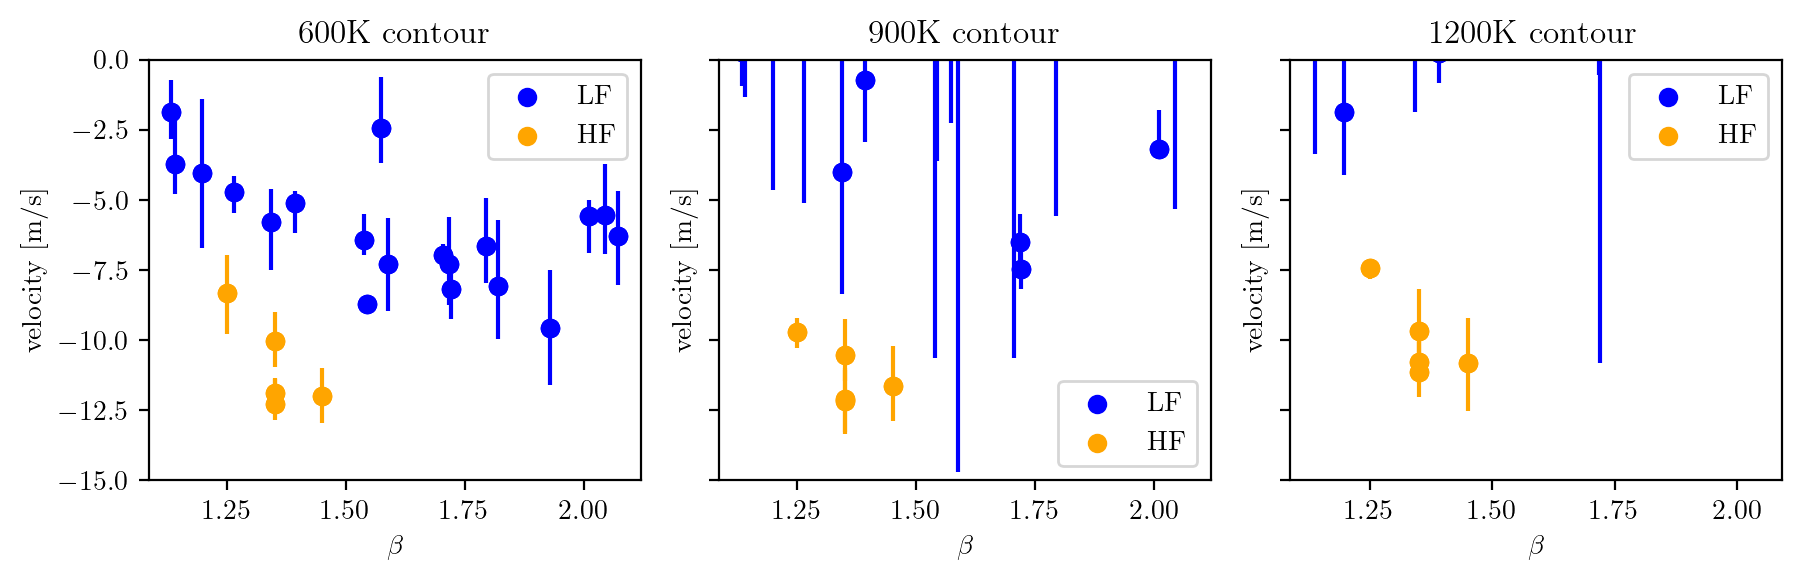

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True, dpi=200)

for i, temp in enumerate(temp_contours):
    temp_K = float(temp) * 300
    lf_df = lf_dfs[i]
    hf_df = hf_dfs[i]
    
    for _, row in lf_df.iterrows():
        axs[i].scatter(row['beta'], row['ejecta_v'], c='blue')
        
        yerr_upper = np.abs(row['ejecta_v_upper'] - row['ejecta_v'])
        yerr_lower = np.abs(row['ejecta_v'] - row['ejecta_v_lower'])
        axs[i].errorbar(row['beta'], row['ejecta_v'], yerr=[[yerr_lower], [yerr_upper]], fmt='o', color='blue')
        
    for _, row in hf_df.iterrows():
        axs[i].scatter(row['beta'], row['ejecta_v'], c='orange')
        
        yerr_upper = np.abs(row['ejecta_v_upper'] - row['ejecta_v'])
        yerr_lower = np.abs(row['ejecta_v'] - row['ejecta_v_lower'])
        axs[i].errorbar(row['beta'], row['ejecta_v'], yerr=[[yerr_lower], [yerr_upper]], fmt='o', color='orange')
        
    
    #axs[i].scatter(hf_df['beta'], hf_df['ejecta_v'], label='HF', c='orange')
    #axs[i].errorbar(hf_df['beta'], hf_df['ejecta_v'], yerr=[hf_df['ejecta_v_lower'], hf_df['ejecta_v_upper']], fmt='o', color='orange')
    axs[i].scatter(lf_df['beta'], lf_df['ejecta_v'], c='blue', label='LF')
    axs[i].scatter(hf_df['beta'], hf_df['ejecta_v'], c='orange', label='HF')
    axs[i].set_title(f'{int(temp_K)}K contour')
    axs[i].set_xlabel(r'$\beta$')
    axs[i].set_ylabel(r'velocity [m/s]')
    axs[i].set_ylim(-15, 0)
    axs[i].legend()
    
    
plt.tight_layout()
fig.savefig('beta_vs_ejecta_velocities.png')


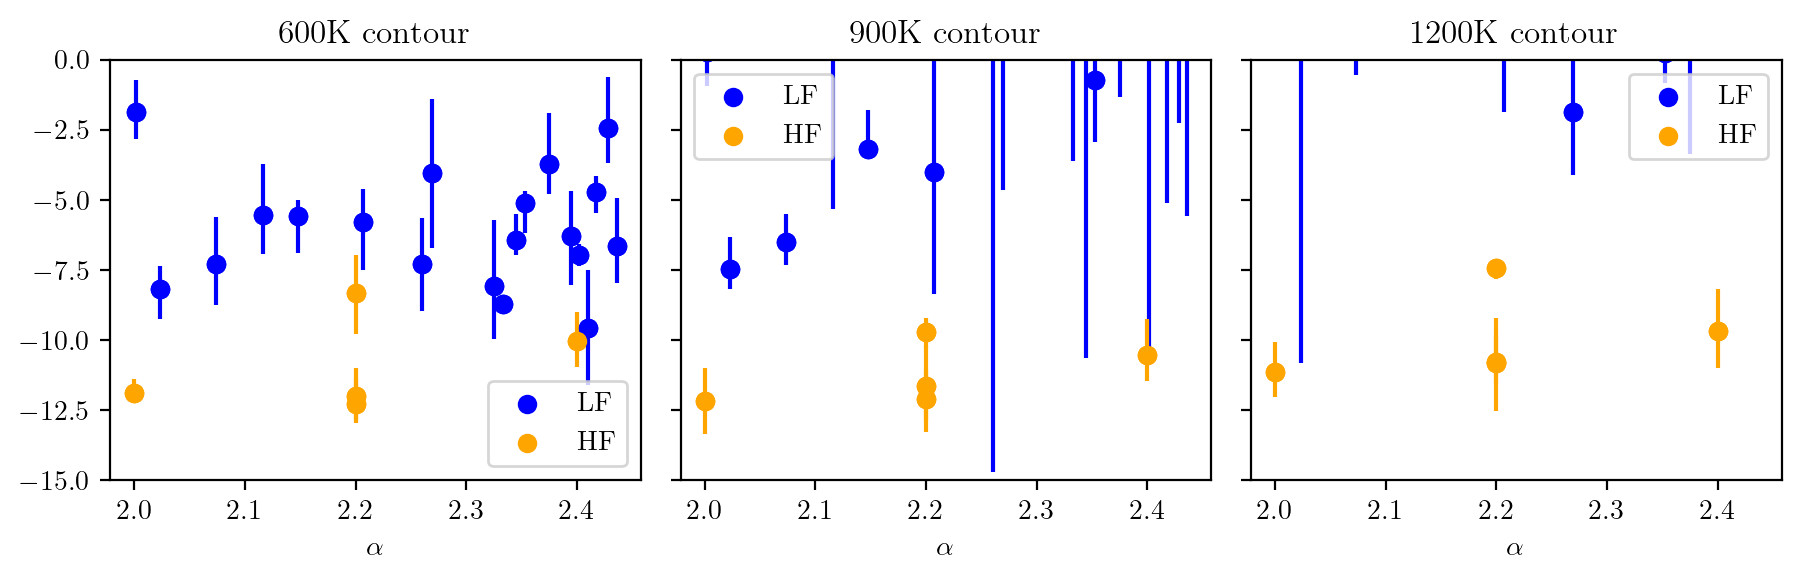

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True, dpi=200)

for i, temp in enumerate(temp_contours):
    temp_K = float(temp) * 300
    lf_df = lf_dfs[i]
    hf_df = hf_dfs[i]
    
    for _, row in lf_df.iterrows():
        axs[i].scatter(row['alpha'], row['ejecta_v'], c='blue')
        
        yerr_upper = np.abs(row['ejecta_v_upper'] - row['ejecta_v'])
        yerr_lower = np.abs(row['ejecta_v'] - row['ejecta_v_lower'])
        axs[i].errorbar(row['alpha'], row['ejecta_v'], yerr=[[yerr_lower], [yerr_upper]], fmt='o', color='blue')
        
    for _, row in hf_df.iterrows():
        axs[i].scatter(row['alpha'], row['ejecta_v'], c='orange')
        
        yerr_upper = np.abs(row['ejecta_v_upper'] - row['ejecta_v'])
        yerr_lower = np.abs(row['ejecta_v'] - row['ejecta_v_lower'])
        axs[i].errorbar(row['alpha'], row['ejecta_v'], yerr=[[yerr_lower], [yerr_upper]], fmt='o', color='orange')
        
        
    axs[i].scatter(lf_df['alpha'], lf_df['ejecta_v'], c='blue', label='LF')
    axs[i].scatter(hf_df['alpha'], hf_df['ejecta_v'], c='orange', label='HF')
    axs[i].set_title(f'{int(temp_K)}K contour')
    axs[i].set_xlabel(r'$\alpha$')
    
    axs[i].set_ylim(-15, 0)
    axs[i].legend()
    
    
plt.tight_layout()
fig.savefig('alpha_vs_ejecta_velocities.png')
